In [133]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [134]:
data= pd.read_csv('C:/Users/AJAY/Downloads/delivery_time.csv')

In [135]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [136]:
delivery=data.rename({'	Delivery Time':'Delivery Time','Sorting Time':'Sorting_Time'},axis=1)

In [137]:
delivery

,Delivery Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [138]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [139]:
delivery.describe()

,Delivery Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [140]:
delivery.corr()

,Delivery Time,Sorting_Time
Delivery Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

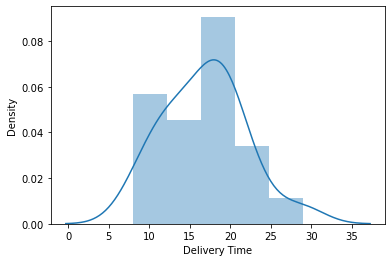

In [141]:
sns.distplot(delivery['Delivery Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

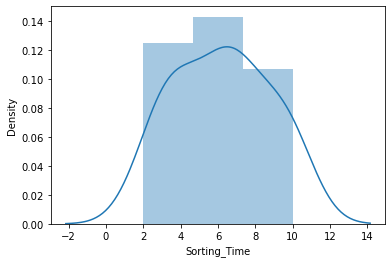

In [142]:
sns.distplot(delivery['Sorting_Time'])

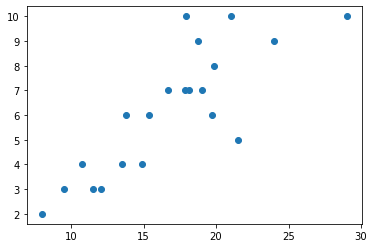

In [143]:
plt.scatter(delivery['Delivery Time'],delivery['Sorting_Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting_Time'>

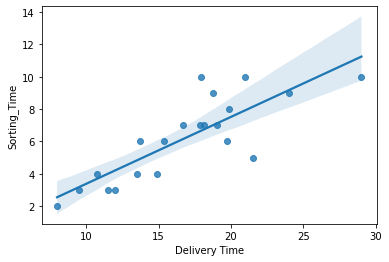

In [144]:
sns.regplot(x='Delivery Time',y='Sorting_Time',data=delivery)

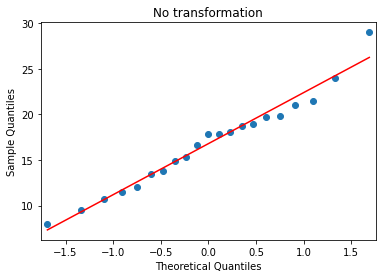

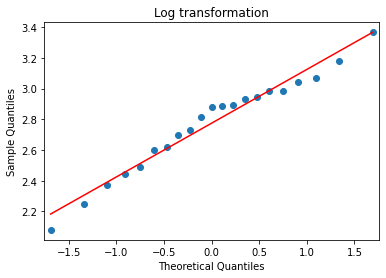

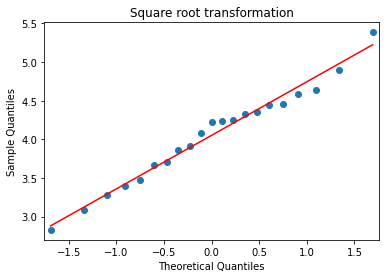

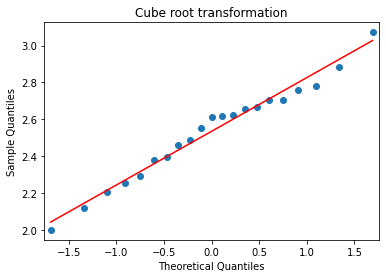

In [145]:
smf.qqplot(delivery['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(delivery['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(delivery['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(delivery['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [146]:
delivery=delivery.rename({'Delivery Time':'DTime','Sorting_Time':'STime'},axis=1)

In [147]:
delivery

,DTime,STime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [148]:
model=sm.ols("DTime~STime",data=delivery).fit()

In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        17:22:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
STime          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformation

In [150]:
model1=sm.ols("np.sqrt(DTime)~np.sqrt(STime)",data=delivery).fit()

In [151]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(DTime)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                        17:22:49   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(STime)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
model2=sm.ols("np.cbrt(DTime)~np.cbrt(STime)",data=delivery).fit()

In [153]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.cbrt(DTime)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                        17:22:49   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(STime)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
model3=sm.ols("np.log(DTime)~np.log(STime)",data=delivery).fit()

In [155]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(DTime)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                        17:22:49   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7420      0.133     13.086      0.000       1.463       2.021
np.log(STime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [156]:
model.params

Intercept    6.582734
STime        1.649020
dtype: float64

In [157]:
model.tvalues

Intercept    3.823349
STime        6.387447
dtype: float64

In [158]:
model.pvalues

Intercept    0.001147
STime        0.000004
dtype: float64

In [159]:
model.rsquared

0.6822714748417231

In [160]:
model.rsquared_adj

0.6655489208860244

# Model Validation

In [161]:
square_root_pred_y =np.square(model1.predict(delivery['STime']))
cube_root_pred_y =pow(model2.predict(delivery['STime']),3)
log_model_pred_y =np.exp(model3.predict(delivery['STime']))

In [162]:
square_root_rmse =np.sqrt(mean_squared_error(delivery['DTime'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(delivery['DTime'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(delivery['DTime'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)


model= 2.9349037688901394 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893574 
log_model= 2.7458288976145497


In [163]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

# prediction

In [164]:
predicted = pd.DataFrame()
predicted['STime'] = delivery.STime
predicted['DTime'] = delivery.DTime
predicted['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted.STime))
predicted

,STime,DTime,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
